In [165]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score , f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from string import punctuation
import nltk

In [166]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [167]:
train.head()

,tweet_id,tweet,sentiment
0,1701,#sxswnui #sxsw #apple defining language of tou...,1
1,1851,Learning ab Google doodles! All doodles should...,1
2,2689,one of the most in-your-face ex. of stealing t...,2
3,4525,This iPhone #SXSW app would b pretty awesome i...,0
4,3604,Line outside the Apple store in Austin waiting...,1


In [168]:

train["sentiment"].value_counts()

1    4311
2    2382
0     456
3     125
Name: sentiment, dtype: int64

In [169]:
combine_df = train.append(test, ignore_index = True, sort = False)
combine_df.head(10)

,tweet_id,tweet,sentiment
0,1701,#sxswnui #sxsw #apple defining language of tou...,1.0
1,1851,Learning ab Google doodles! All doodles should...,1.0
2,2689,one of the most in-your-face ex. of stealing t...,2.0
3,4525,This iPhone #SXSW app would b pretty awesome i...,0.0
4,3604,Line outside the Apple store in Austin waiting...,1.0
5,966,#technews One lone dude awaits iPad 2 at Apple...,1.0
6,1395,"SXSW Tips, Prince, NPR Videos, Toy Shopping Wi...",1.0
7,8182,NU user RT @mention New #UberSocial for #iPhon...,1.0
8,8835,Free #SXSW sampler on iTunes {link} #FreeMusic,2.0
9,883,I think I might go all weekend without seeing ...,2.0


In [170]:
import string

combine_df['tweet'] = combine_df['tweet'].astype(str)



In [98]:
pip install emot

Note: you may need to restart the kernel to use updated packages.


In [171]:
import re
import emot
from emot import emo_unicode
from emo_unicode import EMOTICONS
def convert_emoticons(text):
    for emot in EMOTICONS:
        text = re.sub(u'('+emot+')', "_".join(EMOTICONS[emot].replace(",","").split()), text)
    return text
combine_df['tweet'] = combine_df['tweet'].apply(lambda x : convert_emoticons(str(x)))

In [172]:
from html.parser import HTMLParser
html_parser = HTMLParser()
combine_df['tweet'] = combine_df['tweet'].astype(str)
combine_df['tweet'] = combine_df['tweet'].apply(lambda x: html_parser.unescape(x))


C:\Users\Akshatha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: The unescape method is deprecated and will be removed in 3.5, use html.unescape() instead.
  after removing the cwd from sys.path.


In [173]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt

In [174]:
combine_df['tweet'] = combine_df['tweet'].astype(str)
combine_df['tweet'] = np.vectorize(remove_pattern)(combine_df['tweet'], "@[\w]*") 
combine_df['tweet'] = np.vectorize(remove_pattern)(combine_df['tweet'], "#[\w]*") 


In [175]:
#import string
#def remove_punct(text):
    #text_nopunct="".join([char for char in text if char not in string.punctuation])
    #return text_nopunct
combine_df['tweet'] = combine_df['tweet'].astype(str)
combine_df['tweet'] = combine_df['tweet'].apply(lambda x: re.sub(r'[^\w\s]',' ',x))

combine_df.head()

,tweet_id,tweet,sentiment
0,1701,defining language of touch with different d...,1.0
1,1851,Learning ab Google doodles All doodles should...,1.0
2,2689,one of the most in your face ex of stealing t...,2.0
3,4525,This iPhone app would b pretty awesome if it ...,0.0
4,3604,Line outside the Apple store in Austin waiting...,1.0


In [176]:
import string
def remove_punct(text):
    text_nopunct="".join([char for char in text if char not in string.punctuation])
    return text_nopunct
combine_df['tweet'] = combine_df['tweet'].astype(str)
combine_df['tweet']=combine_df['tweet'].apply(lambda x: remove_punct(x))

combine_df['tweet'] = combine_df['tweet'].str.replace("[^a-zA-Z#]", " ")
combine_df['tweet']=combine_df['tweet'].str.lower()
combine_df['tweet']=combine_df['tweet'].str.replace("sxsw"," ")
combine_df['tweet']=combine_df['tweet'].str.replace("link"," ")
combine_df['tweet']=combine_df['tweet'].str.replace("google"," ")
combine_df['tweet']=combine_df['tweet'].str.replace("ipad"," ")
combine_df['tweet']=combine_df['tweet'].str.replace("iphone"," ")
combine_df['tweet']=combine_df['tweet'].str.replace("apple"," ")
combine_df['tweet']=combine_df['tweet'].str.replace("app"," ")
combine_df['tweet']=combine_df['tweet'].str.replace("called"," ")
combine_df['tweet']=combine_df['tweet'].str.replace("austin"," ")
combine_df['tweet']=combine_df['tweet'].str.replace("store"," ")
combine_df['tweet']=combine_df['tweet'].str.replace("android"," ")
combine_df['tweet']=combine_df['tweet'].str.replace("pop"," ")
combine_df['tweet']=combine_df['tweet'].str.replace("via"," ")
combine_df['tweet']=combine_df['tweet'].str.replace("social"," ")
combine_df['tweet']=combine_df['tweet'].str.replace("network"," ")
combine_df['tweet']=combine_df['tweet'].str.replace("mention"," ")
combine_df['tweet']=combine_df['tweet'].str.replace("new"," ")

In [177]:
combine_df['tweet'] = combine_df['tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))


In [178]:
import re

def tokenize(text):
    tokens=re.split('\W+',text)
    return tokens
combine_df['tweet']=combine_df['tweet'].apply(lambda x:tokenize(x.lower()))
combine_df.head(10)

,tweet_id,tweet,sentiment
0,1701,"[defining, language, touch, with, different, d...",1.0
1,1851,"[learning, doodles, all, doodles, should, ligh...",1.0
2,2689,"[one, the, most, your, face, stealing, the, sh...",2.0
3,4525,"[this, would, pretty, awesome, didn, crash, ev...",0.0
4,3604,"[line, outside, the, waiting, for, the]",1.0
5,966,"[one, lone, dude, awaits]",1.0
6,1395,"[tips, prince, npr, videos, toy, shopping, wit...",1.0
7,8182,"[user, for, now, the, includes, uberguide, spo...",1.0
8,8835,"[free, sampler, itunes]",2.0
9,883,"[think, might, all, weekend, without, seeing, ...",2.0


In [179]:
import nltk
stopword=nltk.corpus.stopwords.words('english')

In [180]:
def remove_stopwords(tokenized_list):
    text=[word for word in tokenized_list if word not in stopword]
    return text
combine_df['tweet']=combine_df['tweet'].apply(lambda x:remove_stopwords(x))

In [181]:
wn=nltk.WordNetLemmatizer()
def lemmatizing(tokenized_text):
    text=[wn.lemmatize(word) for word in tokenized_text]
    return text

combine_df['tweet']=combine_df['tweet'].apply(lambda x:lemmatizing(x))
combine_df.head(10)

,tweet_id,tweet,sentiment
0,1701,"[defining, language, touch, different, dialect...",1.0
1,1851,"[learning, doodle, doodle, light, funny, innov...",1.0
2,2689,"[one, face, stealing, show, yr, school, mkt, e...",2.0
3,4525,"[would, pretty, awesome, crash, every, min, ex...",0.0
4,3604,"[line, outside, waiting]",1.0
5,966,"[one, lone, dude, awaits]",1.0
6,1395,"[tip, prince, npr, video, toy, shopping, zucke...",1.0
7,8182,"[user, includes, uberguide, sponsored]",1.0
8,8835,"[free, sampler, itunes]",2.0
9,883,"[think, might, weekend, without, seeing, case,...",2.0


In [182]:
combine_df['tweet']= [' '.join(x) for x in combine_df['tweet']]
combine_df.head()


,tweet_id,tweet,sentiment
0,1701,defining language touch different dialect beco...,1.0
1,1851,learning doodle doodle light funny innovative ...,1.0
2,2689,one face stealing show yr school mkt expert,2.0
3,4525,would pretty awesome crash every min extended ...,0.0
4,3604,line outside waiting,1.0


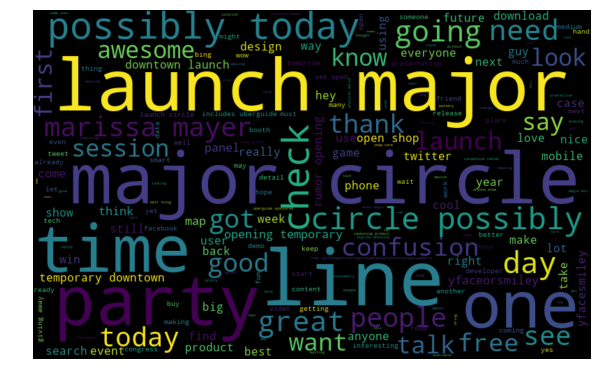

In [183]:
import matplotlib.pyplot as plt 
all_words = ' '.join([text for text in combine_df['tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

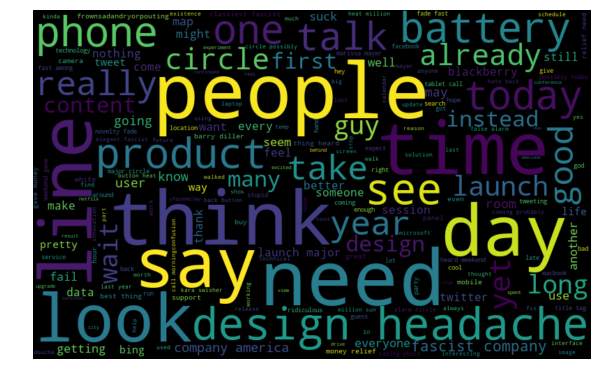

In [184]:
normal_words =' '.join([text for text in combine_df['tweet'][combine_df['sentiment'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

plt.show()

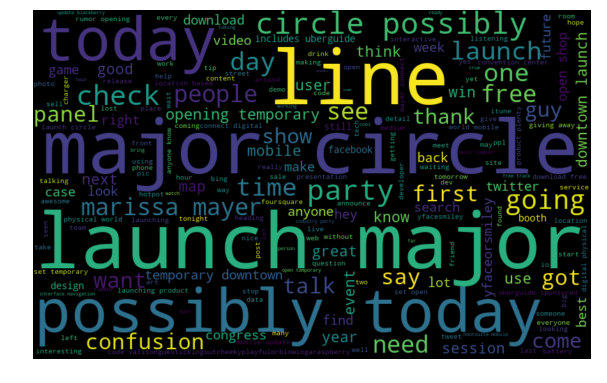

In [185]:
normal_words =' '.join([text for text in combine_df['tweet'][combine_df['sentiment'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

plt.show()

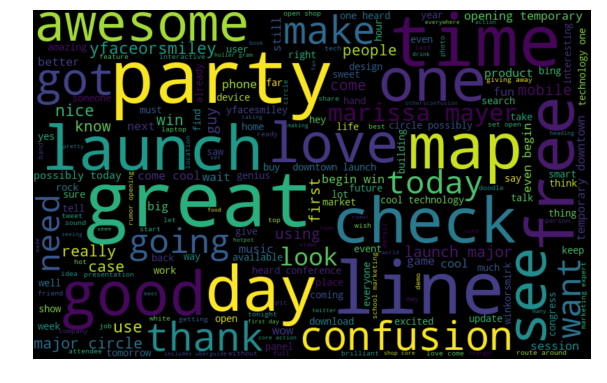

In [186]:
normal_words =' '.join([text for text in combine_df['tweet'][combine_df['sentiment'] == 2]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

plt.show()

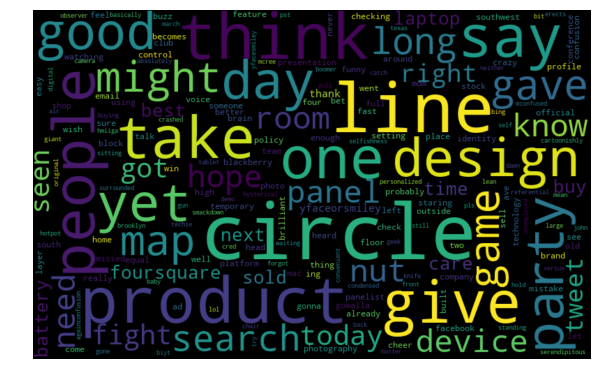

In [187]:
normal_words =' '.join([text for text in combine_df['tweet'][combine_df['sentiment'] == 3]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

plt.show()

In [188]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf_lemm = tfidf_vectorizer.fit_transform(combine_df['tweet'])



In [189]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(ngram_range=(2,2),max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(combine_df['tweet'])


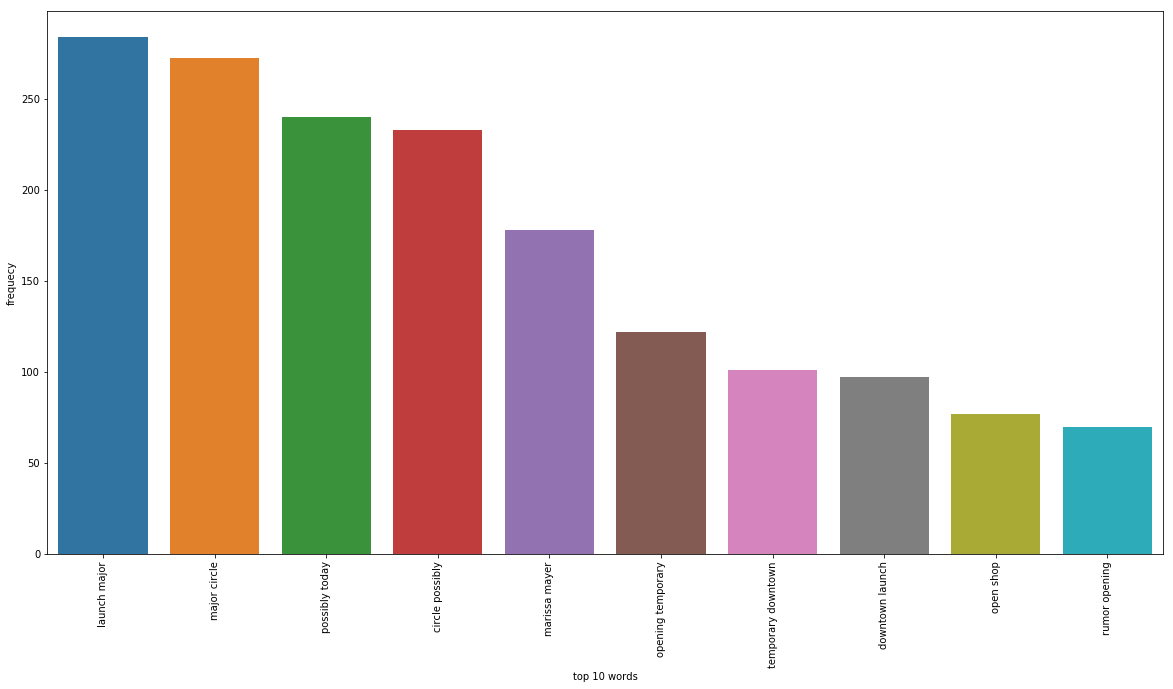

In [190]:
import operator
import seaborn as sns
words = {}
i = 0
sums = np.array(np.sum(bow, axis=0)).flatten()
for word in bow_vectorizer.get_feature_names():
    words[word] = sums[i]
    i += 1
top_10 = sorted(words.items(), key=operator.itemgetter(1), reverse=True)[:10]
top_10_words = [i[0] for i in top_10]
top_10_values = [i[1] for i in top_10]
plt.figure(figsize=(20,10))
plt.xlabel("top 10 words")
plt.ylabel('frequecy')
plt.xticks(rotation=90)
sns.barplot(top_10_words,top_10_values)
plt.show()

In [524]:
bow_vectorizer.vocabulary_

{'line outside': 495,
 'lone dude': 509,
 'dude awaits': 229,
 'includes uberguide': 403,
 'uberguide sponsored': 924,
 'free sampler': 292,
 'sampler itunes': 746,
 'giving away': 314,
 'officially come': 635,
 'come grill': 129,
 'grill make': 348,
 'make case': 538,
 'marissa mayer': 559,
 'mayer future': 566,
 'future location': 301,
 'augmented reality': 31,
 'reality contextual': 715,
 'contextual discovery': 155,
 'launch major': 450,
 'major circle': 535,
 'circle possibly': 114,
 'possibly today': 698,
 'need upgrade': 630,
 'set launch': 777,
 'launch today': 453,
 'long line': 512,
 'check offer': 101,
 'look interesting': 515,
 'interesting launch': 413,
 'stupid game': 848,
 'drive mile': 227,
 'mile year': 584,
 'using map': 937,
 'map navigation': 551,
 'sign entered': 792,
 'entered automatically': 240,
 'heard downtown': 378,
 'lonely planet': 510,
 'planet guide': 690,
 'guide free': 355,
 'awesome version': 35,
 'version web': 942,
 'web site': 970,
 'site coming': 7

In [31]:
sum_words=bow.sum(axis=0)
words_freq=[(word,sum_words[0,idx]) for word,idx in bow_vectorizer.vocabulary_.items()]
words_freq=sorted(words_freq,key=lambda x:x[1],reverse=True)
words_freq

[('launch major', 284),
 ('major circle', 272),
 ('possibly today', 240),
 ('circle possibly', 233),
 ('marissa mayer', 178),
 ('opening temporary', 122),
 ('temporary downtown', 101),
 ('downtown launch', 97),
 ('open shop', 77),
 ('rumor opening', 70),
 ('includes uberguide', 68),
 ('set open', 63),
 ('launch circle', 53),
 ('giving away', 49),
 ('code valitonguestickingoutcheekyplayfulorblowingaraspberry', 46),
 ('uberguide sponsored', 45),
 ('shop core', 43),
 ('core action', 43),
 ('begin win', 43),
 ('launching product', 42),
 ('physical world', 42),
 ('look like', 42),
 ('digital physical', 40),
 ('convention center', 40),
 ('best thing', 39),
 ('come cool', 38),
 ('location based', 37),
 ('cool technology', 36),
 ('connect digital', 36),
 ('world mobile', 35),
 ('open temporary', 34),
 ('technology heard', 34),
 ('set temporary', 33),
 ('product plenty', 33),
 ('heard conference', 32),
 ('map mobile', 32),
 ('design headache', 31),
 ('circle today', 31),
 ('marketing expert', 3

In [192]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix,classification_report

In [156]:
X = tfidf_lemm[:7274,:]
y = train['sentiment']

In [157]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

lreg = LogisticRegression()
lreg.fit(X_train,y_train)
y_pred = lreg.predict(X_test)
#print("F1 Score = " ,f1_score(y_test, y_pred))

C:\Users\Akshatha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Akshatha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [159]:
from sklearn.metrics import f1_score
print("F1 Score = " ,f1_score(y_test, y_pred,average='weighted'))

F1 Score =  0.603930847177295


C:\Users\Akshatha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [160]:
print("Accuracy = " , accuracy_score(y_test, y_pred))
print("Precision = " ,precision_score(y_test,y_pred,average='weighted'))
print("Recall = " ,recall_score(y_test, y_pred,average='weighted'))
print("F1 Score = " ,f1_score(y_test,y_pred,average='weighted'))


Accuracy =  0.6481099656357389
Precision =  0.6211260714144646
Recall =  0.6481099656357389
F1 Score =  0.603930847177295


C:\Users\Akshatha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Akshatha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [162]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
print(f1_score(y_test,y_pred_rf,average='weighted'))
print("Accuracy = " , accuracy_score(y_test, y_pred_rf))
print("Precision = " ,precision_score(y_test,y_pred_rf,average='weighted'))
print("Recall = " ,recall_score(y_test, y_pred_rf,average='weighted'))
print("F1 Score = " ,f1_score(y_test,y_pred_rf,average='weighted'))


C:\Users\Akshatha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.6139463949482543
Accuracy =  0.6336769759450172
Precision =  0.6103741886216113
Recall =  0.6336769759450172
F1 Score =  0.6139463949482543


In [118]:
param = {'n_estimators':[10,150,300],
       'max_depth' : [30,60,90,None]}
gs=GridSearchCV(rf,param,cv=5,n_jobs=-1)


gs.fit(X_train,y_train)
y_pred_gs = gs.predict(X_test)

In [119]:
print(f1_score(y_test,y_pred_gs,average='micro'))

0.6529209621993127


In [120]:
from imblearn.over_sampling import RandomOverSampler
os = RandomOverSampler(random_state=2)
X_sample3, y_sample3 = os.fit_sample(X_train,y_train)
rf.fit(X_sample3, y_sample3)
y_pred_os = rf.predict(X_test)
print(f1_score(y_test,y_pred_os,average='micro'))

0.5890034364261169


In [121]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=2)
X_sample4, y_sample4 = smote.fit_sample(X_train,y_train)
rf.fit(X_sample4, y_sample4)
y_pred_sm = rf.predict(X_test)
print(f1_score(y_test,y_pred_sm,average='micro'))

0.5773195876288659


In [122]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state =42,max_depth=3)

dt.fit(X_train,y_train)

y_pred_dt = dt.predict(X_test)
print(f1_score(y_test,y_pred_dt,average='micro'))

0.6048109965635738


In [123]:
from sklearn.ensemble import BaggingClassifier

# Code starts here
bagging_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100, max_samples=100, random_state=0)
bagging_clf.fit(X_train,y_train)

y_pred_bg = bagging_clf.predict(X_test)
print(f1_score(y_test,y_pred_bg,average='micro'))

0.6116838487972509


In [164]:
from sklearn.ensemble import GradientBoostingClassifier
gb= GradientBoostingClassifier(n_estimators=11, max_depth=4, random_state=0)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print(f1_score(y_test,y_pred_gb,average='micro'))
print(classification_report(y_test,y_pred_gb))

print("Accuracy = " , accuracy_score(y_test, y_pred_gb))
print("Precision = " ,precision_score(y_test,y_pred_gb,average='weighted'))
print("Recall = " ,recall_score(y_test, y_pred_gb,average='weighted'))
print("F1 Score = " ,f1_score(y_test,y_pred_gb,average='weighted'))

0.6233676975945017
              precision    recall  f1-score   support

           0       0.62      0.06      0.12        77
           1       0.62      0.97      0.76       871
           2       0.70      0.12      0.21       483
           3       0.00      0.00      0.00        24

    accuracy                           0.62      1455
   macro avg       0.49      0.29      0.27      1455
weighted avg       0.64      0.62      0.53      1455

Accuracy =  0.6233676975945017
Precision =  0.6377632739375181
Recall =  0.6233676975945017
F1 Score =  0.5299185923776326


In [163]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)
y_pred_s = svc.predict(X_test)
print(f1_score(y_test,y_pred_s,average='weighted'))
print(f1_score(y_test,y_pred_rf,average='weighted'))
print("Accuracy = " , accuracy_score(y_test, y_pred_s))
print("Precision = " ,precision_score(y_test,y_pred_s,average='weighted'))
print("Recall = " ,recall_score(y_test, y_pred_s,average='weighted'))
print("F1 Score = " ,f1_score(y_test,y_pred_s,average='weighted'))

C:\Users\Akshatha\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.4483256656413529
0.6139463949482543
Accuracy =  0.5986254295532646
Precision =  0.35835240490783055
Recall =  0.5986254295532646
F1 Score =  0.4483256656413529


C:\Users\Akshatha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Akshatha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Akshatha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [126]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(n_estimators=150)
xgb_model.fit(X_train,y_train)
y_pred_x = xgb_model.predict(X_test)
print(f1_score(y_test,y_pred_x,average='micro'))

0.6378006872852233


In [127]:
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier()
sgd_model.fit(X_train,y_train)
y_pred_sg = sgd_model.predict(X_test)
print(f1_score(y_test,y_pred_sg,average='micro'))

0.6556701030927835


In [128]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(X_train,y_train)
y_pred_nb = nb_model.predict(X_test)
print(f1_score(y_test,y_pred_nb,average='micro'))

0.629553264604811


In [ ]:
#from imblearn.over_sampling import RandomOverSampler
#os = RandomOverSampler(random_state=2)
#X_sample3, y_sample3 = os.fit_sample(X_train,y_train)
#nb_model.fit(X_sample3, y_sample3)
#y_pred_os = nb_model.predict(X_test)
#print(f1_score(y_test,y_pred_os,average='micro'))

In [193]:
X1 = bow[:7274,:]
y1 = train['sentiment']

In [194]:
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size=0.2,random_state=42)

lreg = LogisticRegression()
lreg.fit(X1_train,y1_train)
y1_pred = lreg.predict(X1_test)

print(classification_report(y1_test,y1_pred))

              precision    recall  f1-score   support

           0       0.57      0.10      0.18        77
           1       0.62      0.94      0.75       871
           2       0.59      0.16      0.25       483
           3       0.00      0.00      0.00        24

    accuracy                           0.62      1455
   macro avg       0.45      0.30      0.29      1455
weighted avg       0.60      0.62      0.54      1455



C:\Users\Akshatha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Akshatha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Akshatha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Akshatha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Akshatha\Anaconda3\lib\site-pack

In [195]:
print("Accuracy = " , accuracy_score(y1_test, y1_pred))
print("Precision = " ,precision_score(y1_test,y1_pred,average='weighted'))
print("Recall = " ,recall_score(y1_test, y1_pred,average='weighted'))
print("F1 Score = " ,f1_score(y1_test,y1_pred,average='weighted'))


Accuracy =  0.6213058419243986
Precision =  0.6011970075873566
Recall =  0.6213058419243986
F1 Score =  0.5414042612112364


C:\Users\Akshatha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Akshatha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [196]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X1_train,y1_train)
y1_pred_s = svc.predict(X1_test)

print(classification_report(y1_test,y1_pred_s))
print("Accuracy = " , accuracy_score(y1_test, y1_pred_s))
print("Precision = " ,precision_score(y1_test,y1_pred_s, average='weighted'))
print("Recall = " ,recall_score(y1_test, y1_pred_s,average='weighted'))
print("F1 Score = " ,f1_score(y1_test,y1_pred_s,average='weighted'))


C:\Users\Akshatha\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        77
           1       0.60      1.00      0.75       871
           2       0.00      0.00      0.00       483
           3       0.00      0.00      0.00        24

    accuracy                           0.60      1455
   macro avg       0.15      0.25      0.19      1455
weighted avg       0.36      0.60      0.45      1455

Accuracy =  0.5986254295532646
Precision =  0.35835240490783055
Recall =  0.5986254295532646
F1 Score =  0.4483256656413529


C:\Users\Akshatha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Akshatha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Akshatha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Akshatha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C

In [197]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier()
rf.fit(X1_train,y1_train)
y1_pred_rf = rf.predict(X1_test)

print("Accuracy = " , accuracy_score(y1_test, y1_pred_rf))
print("Precision = " ,precision_score(y1_test,y1_pred_rf,average='weighted'))
print("Recall = " ,recall_score(y1_test, y1_pred_rf,average='weighted'))
print("F1 Score = " ,f1_score(y1_test,y1_pred_rf,average='weighted'))

print(classification_report(y1_test,y1_pred_rf))

C:\Users\Akshatha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy =  0.613745704467354
Precision =  0.5843722850296883
Recall =  0.613745704467354
F1 Score =  0.5548747820125703
              precision    recall  f1-score   support

           0       0.44      0.16      0.23        77
           1       0.63      0.90      0.74       871
           2       0.56      0.21      0.30       483
           3       0.00      0.00      0.00        24

    accuracy                           0.61      1455
   macro avg       0.41      0.31      0.32      1455
weighted avg       0.58      0.61      0.55      1455



In [198]:
from sklearn.ensemble import GradientBoostingClassifier
gb= GradientBoostingClassifier(n_estimators=11, max_depth=4, random_state=0)
gb.fit(X1_train, y1_train)
y1_pred_gb = gb.predict(X1_test)


print(classification_report(y1_test,y1_pred_gb))
print("Accuracy = " , accuracy_score(y1_test, y1_pred_gb))
print("Precision = " ,precision_score(y1_test,y1_pred_gb,average='weighted'))
print("Recall = " ,recall_score(y1_test, y1_pred_gb,average='weighted'))
print("F1 Score = " ,f1_score(y1_test,y1_pred_gb,average='weighted'))

              precision    recall  f1-score   support

           0       0.67      0.03      0.05        77
           1       0.61      0.99      0.75       871
           2       0.80      0.04      0.08       483
           3       0.20      0.04      0.07        24

    accuracy                           0.61      1455
   macro avg       0.57      0.27      0.24      1455
weighted avg       0.67      0.61      0.48      1455

Accuracy =  0.60893470790378
Precision =  0.667447426546996
Recall =  0.60893470790378
F1 Score =  0.48052284655893357


In [78]:
print(classification_report(y1_test,y1_pred_gb))

              precision    recall  f1-score   support

           0       0.67      0.03      0.05        77
           1       0.61      0.99      0.75       871
           2       0.80      0.04      0.08       483
           3       0.20      0.04      0.07        24

    accuracy                           0.61      1455
   macro avg       0.57      0.27      0.24      1455
weighted avg       0.67      0.61      0.48      1455



In [38]:
#lreg,rf,gs,dt,bagging_clf,gb,svc,xgb_model,nb_model,sgd_model

In [199]:
dtest=bow[7274:]

In [200]:
y_test_sm = gb.predict(dtest)


Index(['tweet_id', 'sentiment'], dtype='object')

In [208]:
output = pd.DataFrame({'tweet_id':test['tweet_id'],'sentiment':y_test_sm})
output.head()

,tweet_id,sentiment
0,7506,1
1,7992,1
2,247,1
3,7688,1
4,3294,1


In [209]:
output.to_csv(path_or_buf = r'C:\Users\Akshatha\Downloads\final\sent.csv',index=False)

In [203]:
#sgd=69,nb/os=46,xgb=46,gb=72,rf=62,gs=0.7

In [ ]:
#bow=svc=0.67,rf=0.64,gb=0.73,